#  Indian Startup Funding Analysis

Welcome to the **Indian Startup Funding Analysis project**.

In this notebook, we will:

- Explore funding trends over years
- Identify top funded sectors
- Find the most funded startups
- Analyse cities with most startups funded
- Discover top investors in India
- Understand distribution of investment types
- Calculate average funding per sector

 **Objective:** To derive meaningful business and financial insights from the Indian startup ecosystem using real funding data.

Let's begin.


In [6]:
#  Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting plot styles for clarity
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

print(" Libraries imported successfully.")


 Libraries imported successfully.


In [7]:
df = pd.read_csv('/Users/aditya/Downloads/startup_funding.csv')

# Display first 5 rows
df.head()


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


## Dataset Overview

Before starting analysis, we will check:

- Number of rows and columns
- Data types of each column
- Missing values


In [8]:
# Checking basic info
df.info()

# Checking missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB

Missing values in each column:
Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks    

##  Data Cleaning

Before analysis, we will:

- Rename columns for consistency
- Convert 'Amount in USD' to numeric type
- Standardise date format
- Handle missing values where required


In [9]:
#  Renaming columns for consistency

df.rename(columns={
    'Date dd/mm/yyyy': 'Date',
    'Startup Name': 'StartupName',
    'Industry Vertical': 'IndustryVertical',
    'SubVertical': 'SubVertical',
    'City  Location': 'CityLocation',
    'Investors Name': 'InvestorsName',
    'InvestmentnType': 'InvestmentType',
    'Amount in USD': 'AmountInUSD'
}, inplace=True)

print(" Columns renamed successfully.")


 Columns renamed successfully.


In [10]:
#  Converting 'AmountInUSD' to numeric after cleaning commas and other characters

# Remove commas and non-numeric characters
df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '')
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'], errors='coerce')

print(" 'AmountInUSD' converted to numeric. Checking sample data:")
df[['AmountInUSD']].head()


 'AmountInUSD' converted to numeric. Checking sample data:


,AmountInUSD
0,200000000.0
1,8048394.0
2,18358860.0
3,3000000.0
4,1800000.0


In [11]:
#  Convert 'Date' to datetime format

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(" 'Date' column converted to datetime. Sample dates:")
df['Date'].head()


 'Date' column converted to datetime. Sample dates:


0   2020-09-01
1          NaT
2   2020-09-01
3   2020-02-01
4   2020-02-01
Name: Date, dtype: datetime64[ns]

##  Funding Trends Over Years

In this section, we will analyse the **total funding amount received by startups each year** to understand how investments have changed over time in the Indian startup ecosystem.


/var/folders/4w/5fznd69s4wb2qrtbw7ttb4480000gn/T/ipykernel_15758/2143461904.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=funding_by_year, x='Year', y='AmountInUSD', palette='Blues_d')


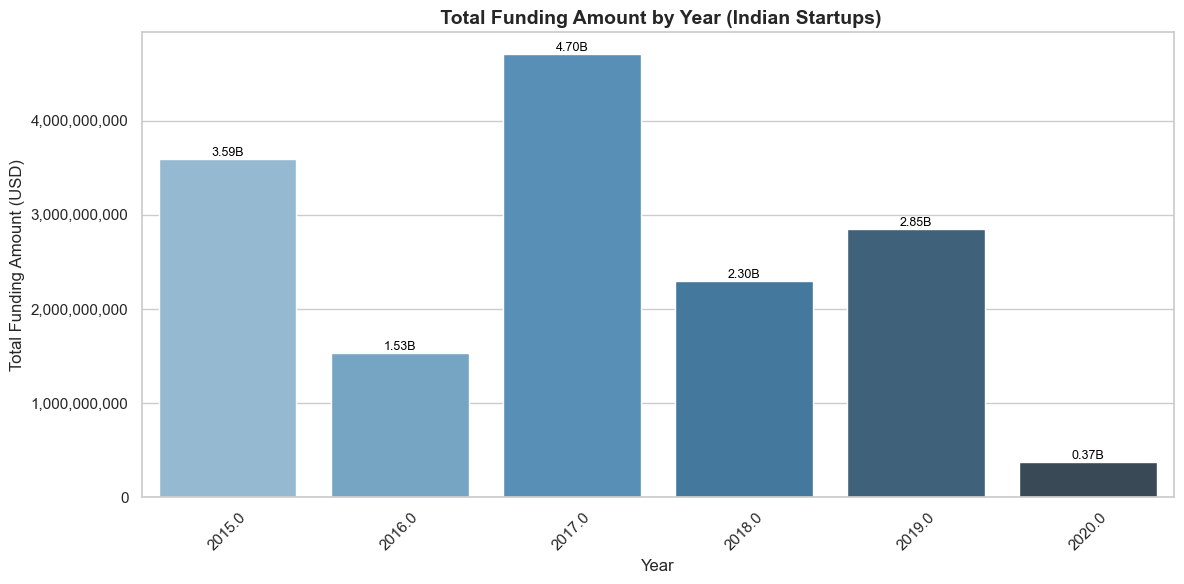

In [18]:
#  Extract year from Date
df['Year'] = df['Date'].dt.year

#  Group by Year and sum the funding amounts
funding_by_year = df.groupby('Year')['AmountInUSD'].sum().reset_index()

#  Improved Funding Trends Plot

import matplotlib.ticker as ticker

plt.figure(figsize=(12,6))
ax = sns.barplot(data=funding_by_year, x='Year', y='AmountInUSD', palette='Blues_d')

# Title and labels
plt.title(" Total Funding Amount by Year (Indian Startups)", fontsize=14, weight='bold')
plt.ylabel("Total Funding Amount (USD)")
plt.xlabel("Year")

# Format y-axis with readable numbers (e.g. millions or billions)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adding data labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/1e9:.2f}B',   # shows in millions with 'M' suffix
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Top Funded Sectors

In this section, we will identify the sectors that have received the highest cumulative funding. This helps understand which industries attract the most investor interest in India.


/var/folders/4w/5fznd69s4wb2qrtbw7ttb4480000gn/T/ipykernel_15758/3446559424.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='AmountInUSD', y='IndustryVertical', data=top_sectors, palette='Greens_d')


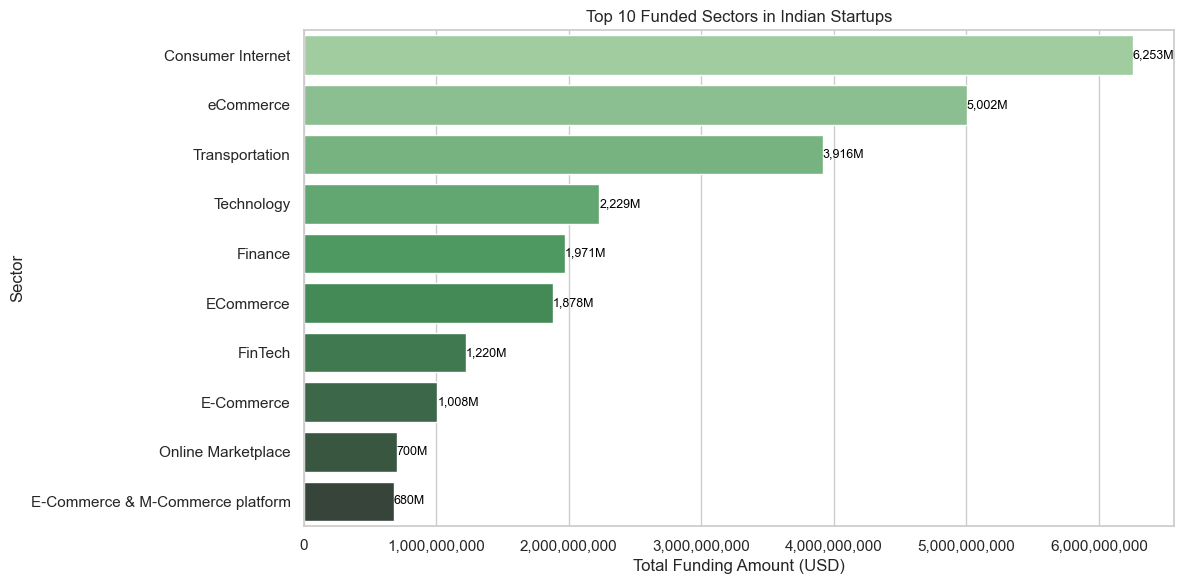

In [22]:
# Group by Industry Vertical and sum funding amounts
top_sectors = df.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False).head(10)

# Reset index for plotting
top_sectors = top_sectors.reset_index()

# Plotting
plt.figure(figsize=(12,6))
ax = sns.barplot(x='AmountInUSD', y='IndustryVertical', data=top_sectors, palette='Greens_d')

# Title and labels
plt.title("Top 10 Funded Sectors in Indian Startups")
plt.xlabel("Total Funding Amount (USD)")
plt.ylabel("Sector")

# Format x-axis with readable numbers
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adding data labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width/1e6):,}M',
                (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


## Most Funded Startups

Here, we identify the startups that have received the highest total funding. This highlights the major players in the Indian startup ecosystem.


/var/folders/4w/5fznd69s4wb2qrtbw7ttb4480000gn/T/ipykernel_15758/3723199544.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='AmountInUSD', y='StartupName', data=top_startups, palette='Purples_d')


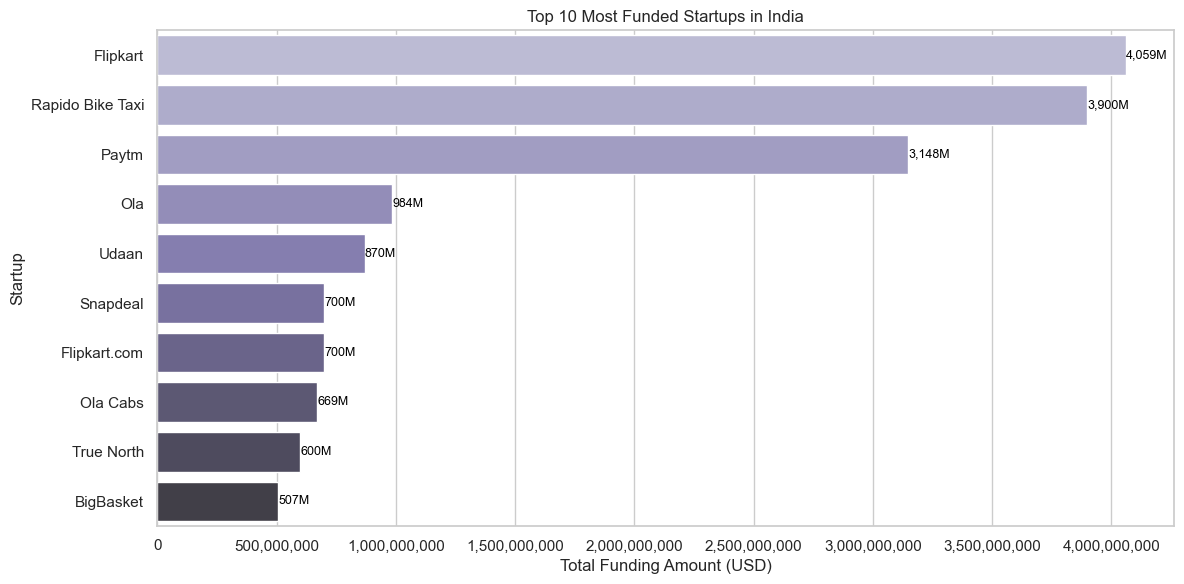

In [20]:
# Group by Startup Name and sum funding amounts
top_startups = df.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False).head(10)

# Reset index for plotting
top_startups = top_startups.reset_index()

# Plotting
plt.figure(figsize=(12,6))
ax = sns.barplot(x='AmountInUSD', y='StartupName', data=top_startups, palette='Purples_d')

# Title and labels
plt.title("Top 10 Most Funded Startups in India")
plt.xlabel("Total Funding Amount (USD)")
plt.ylabel("Startup")

# Format x-axis with commas
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adding data labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width/1e6):,}M',
                (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


## Cities with Most Startups Funded

In this section, we analyse the cities with the highest number of startups funded to understand the geographical distribution of startup activity in India.


/var/folders/4w/5fznd69s4wb2qrtbw7ttb4480000gn/T/ipykernel_15758/2402579656.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='CityLocation', data=city_counts, palette='Oranges_d')


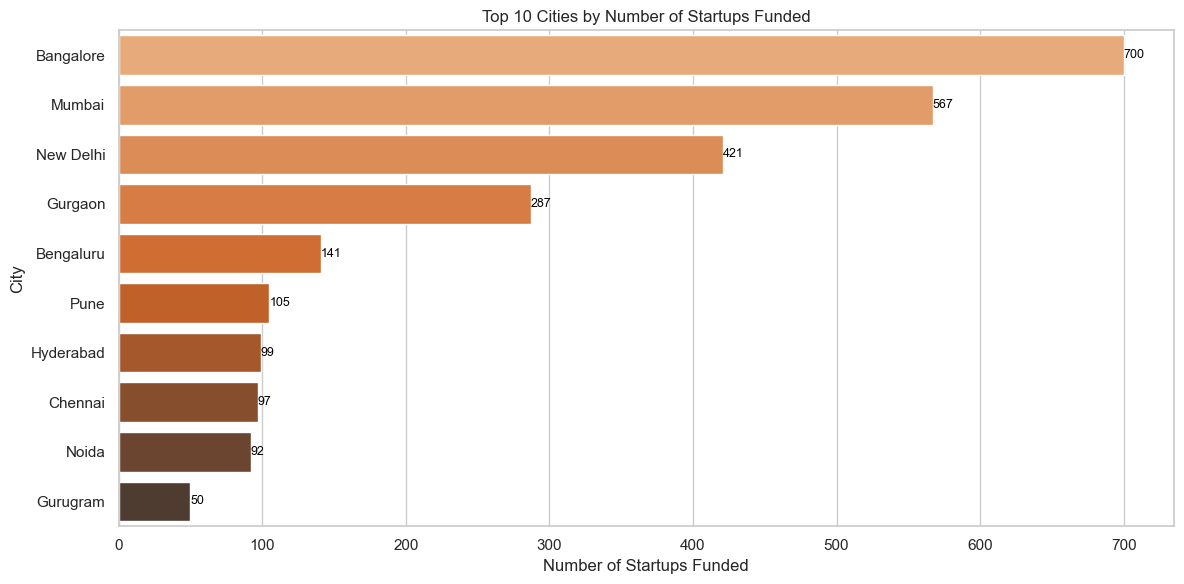

In [23]:
# Count number of startups funded per city
city_counts = df['CityLocation'].value_counts().head(10)

# Reset index for plotting
city_counts = city_counts.reset_index()
city_counts.columns = ['CityLocation', 'Count']

# Plotting
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Count', y='CityLocation', data=city_counts, palette='Oranges_d')

# Title and labels
plt.title("Top 10 Cities by Number of Startups Funded")
plt.xlabel("Number of Startups Funded")
plt.ylabel("City")

# Adding data labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}',
                (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


## Top Investors

Here, we identify the investors involved in the most number of funding deals. This reveals the most active investors supporting startups in India.


/var/folders/4w/5fznd69s4wb2qrtbw7ttb4480000gn/T/ipykernel_15758/3254553125.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Count', y='Investor', data=top_investors, palette='Reds_d')


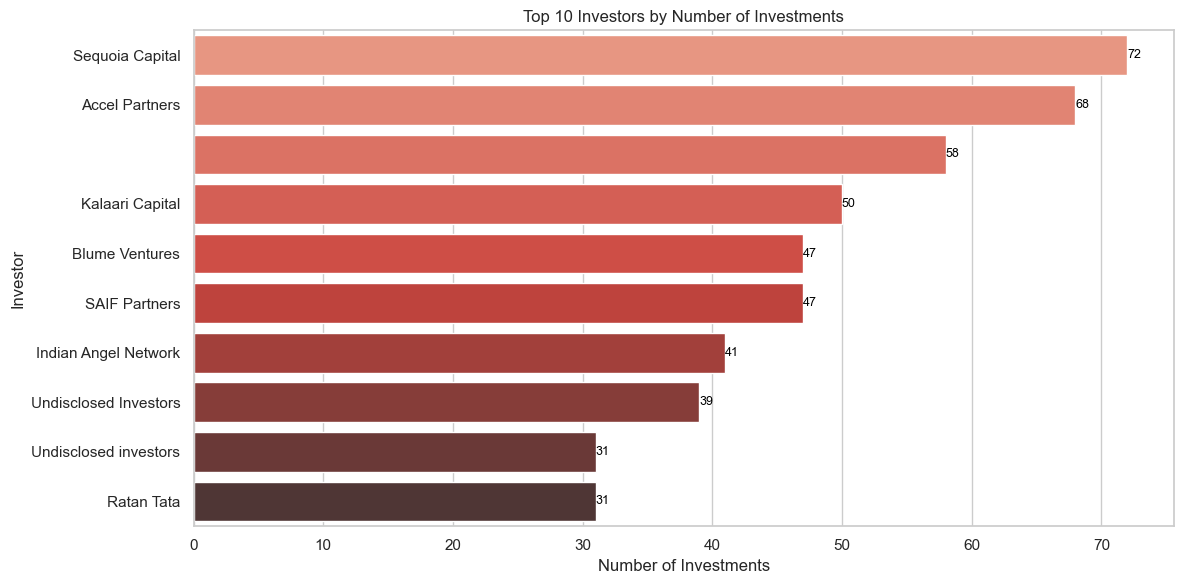

In [28]:
# Extract all investors (split multiple investors listed together)
investors_series = df['InvestorsName'].dropna().str.split(',').explode().str.strip()

# Count top investors
top_investors = investors_series.value_counts().head(10).reset_index()
top_investors.columns = ['Investor', 'Count']

# Plotting
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Count', y='Investor', data=top_investors, palette='Reds_d')

# Title and labels
plt.title("Top 10 Investors by Number of Investments")
plt.xlabel("Number of Investments")
plt.ylabel("Investor")

# Adding data labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width):,}',
                (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


## Investment Type Analysis

In this section, we analyse the distribution of different types of investments to understand at which funding stages startups are raising capital.


/var/folders/4w/5fznd69s4wb2qrtbw7ttb4480000gn/T/ipykernel_15758/2361942116.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='InvestmentType_Clean', y='Count', data=investment_type_grouped, palette='coolwarm')


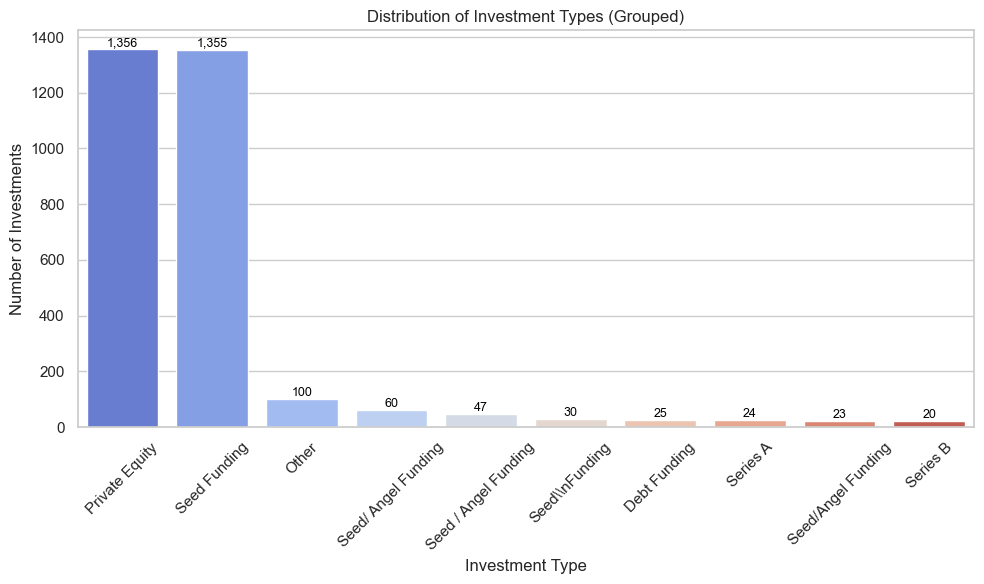

In [31]:
# Group rare investment types as 'Other' for clarity
threshold = 20  # minimum count to show individually
investment_type_counts['InvestmentType_Clean'] = investment_type_counts.apply(
    lambda x: x['InvestmentType'] if x['Count'] >= threshold else 'Other', axis=1
)

# Re-group to include 'Other'
investment_type_grouped = investment_type_counts.groupby('InvestmentType_Clean')['Count'].sum().reset_index()

# Sort by count descending
investment_type_grouped = investment_type_grouped.sort_values('Count', ascending=False)

# Plotting
plt.figure(figsize=(10,6))
ax = sns.barplot(x='InvestmentType_Clean', y='Count', data=investment_type_grouped, palette='coolwarm')

# Title and labels
plt.title("Distribution of Investment Types (Grouped)")
plt.xlabel("Investment Type")
plt.ylabel("Number of Investments")
plt.xticks(rotation=45)

# Adding data labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9, color='black')

plt.tight_layout()
plt.show()



## Average Funding Per Sector

In this section, we calculate the average funding amount received by startups in each sector. This helps identify sectors that may receive fewer deals but higher ticket sizes on average.


/var/folders/4w/5fznd69s4wb2qrtbw7ttb4480000gn/T/ipykernel_15758/2307078911.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='AmountInUSD', y='IndustryVertical', data=avg_funding_sector, palette='magma')


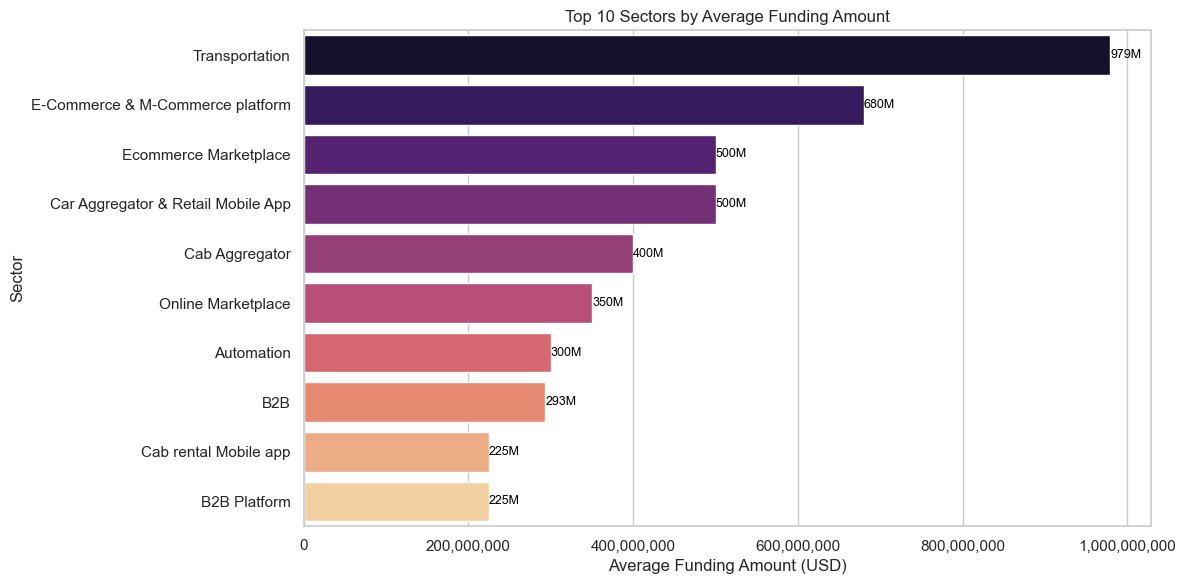

In [32]:
# Calculate mean funding per sector
avg_funding_sector = df.groupby('IndustryVertical')['AmountInUSD'].mean().sort_values(ascending=False).head(10)

# Reset index for plotting
avg_funding_sector = avg_funding_sector.reset_index()

# Plotting
plt.figure(figsize=(12,6))
ax = sns.barplot(x='AmountInUSD', y='IndustryVertical', data=avg_funding_sector, palette='magma')

# Title and labels
plt.title("Top 10 Sectors by Average Funding Amount")
plt.xlabel("Average Funding Amount (USD)")
plt.ylabel("Sector")

# Format x-axis with commas
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Adding data labels on bars
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width/1e6):,}M',
                (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()
